In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget https://github.com/leekyuyoung20230313/pythone/raw/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/data/imagedata.npy -O data.npy

In [85]:
data = np.load('data.npy')

In [101]:
# 주성분 분석
from sklearn.decomposition import PCA

In [102]:
# 10000개의 성분을 50개로 축소.
data_2dim = data.reshape(-1,10000)
pca = PCA(n_components=50)
pca.fit(data_2dim)

PCA(n_components=50)

In [103]:
pca.n_components_

50

In [108]:
data_pca.shape # 데이터는 300개지만 피처는 50개 . # 최종적으로 쓰는건 이거임.

(300, 50)

In [109]:
pca.inverse_transform(data_pca).shape # 원복하기를 원할 때.

(300, 10000)

In [104]:
# 300개짜리 데이터를 50개로 줄인 것임. 랜덤하게 50개로 뽑은 것이 아니라 50개로 축소한 것.
# 아까는(평균) 3개로 축소한 것임.
# 300개의 이미지를 모두 보고 그 이미지에서 중요한 특징을 본 다음 그 특징을 최대한 유지하면서 50개로 죽소한 것.
data_2dim.shape, pca.components_.shape

((300, 10000), (50, 10000))

In [105]:
component_data = pca.components_.reshape(-1,100,100)

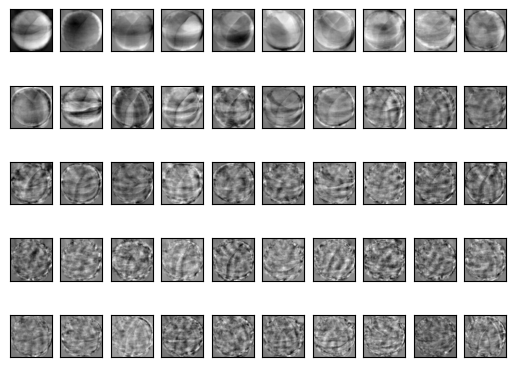

In [106]:
# 50개만 가지고 표현한 이미지. 특성을 50개로 줄였을 때 어떤 이미지를 창조하는가.
for idx,img in enumerate(component_data) :
  plt.subplot(5,10,idx+1)
  plt.imshow(img,cmap='gray_r')
  plt.xticks([])
  plt.yticks([])
plt.show()

In [110]:
#들어있는 데이터가 아니라 피처 자체의 갯수를 줄여주는 것.

In [111]:
# Explained Variance (설명된 분산)
# PCA에서 각 주성분이(50개)이 데이터의 변동을 얼마나 잘 설명하는지를 나타내는 지표.
# 변수들의 선형조합

In [112]:
pca.explained_variance_  # 분산은 :: 떨어진 정도를 나타냄. ratio는 비율을 나타냄
pca.explained_variance_ratio_ # 합하면 1에 가까움. # np.sum(pca.explained_variance_ratio_ )

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578895, 0.00511203, 0.00486384, 0.00480346,
       0.00447838, 0.00437318, 0.00408034, 0.00389477, 0.00372442,
       0.00359291, 0.00331461, 0.00317844, 0.00304326, 0.00303774,
       0.00288841, 0.00275786, 0.00264979, 0.00255846, 0.0025209 ,
       0.00247385, 0.00239398, 0.00230924, 0.00221499, 0.00216949,
       0.0021377 , 0.00196595, 0.00192493, 0.00190839, 0.00185182,
       0.0018267 , 0.00171626, 0.00169642, 0.00162254, 0.00159636])

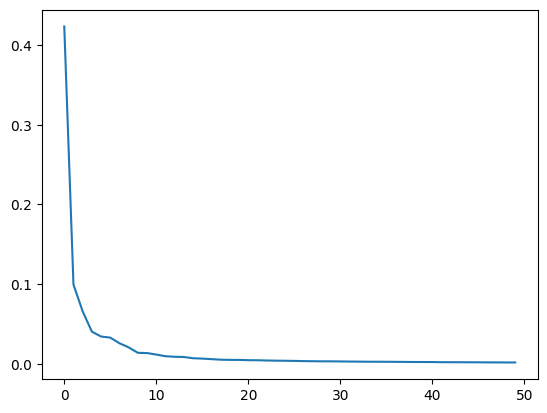

In [113]:
plt.plot(pca.explained_variance_ratio_)
 # 값이 적을수록 좋은거임.
# 주성분의 갯수가 너무 작으면 분산이커져서 그래도 20개 이상은 확보하는 것이 좋음.

In [114]:
# 성능비교
# 분류기와 함께 사용

from sklearn.linear_model import LogisticRegression # 이건 지도학습임. but 내가 갖고있는 데이터는 비지도학습. 따라서 정답 만들어주기.
target = np.array([0]*100+[1]*100+[2]*100)

In [115]:
# 교차검증 해볼 것.
from sklearn.model_selection import cross_validate
score = cross_validate(LogisticRegression(),data_2dim,target)  # pca를 적용하지 않고 차수만 2차원으로 맞춰준 상태.
np.mean(score['fit_time']),  np.mean(score['test_score'])

(2.0305832862854003, 0.9966666666666667)

In [116]:
# 중요한 속성의 데이터만 모아놓은 것이므로 노이즈 제거 효과가 있다. 핵심만 갖다놓은거! 그래서 예측을 더 잘하고 수행속도도 많이 차이남!

# 일반적인 머신러닝에서도 피처들이 10개 넘어가고 그러면 축소시켜서 유용하게 사용가능! 중요성 적은 피처들을 알아서 걸러줌.
# 저번에 배운 분산 2번보고, 영향력 보고 이러는 것을 수학적으로 한번에 대신 해주는 것임.

In [117]:
pca = PCA(n_components=0.5)  # 특성을 50%로. 비율로 줄이는 것을 말한 거임. 이러니깐 얘가 2개면 되겠다고 찾아준거.
pca.fit(data_2dim)
pca.n_components_

2

In [118]:
data_pca = pca.transform(data_2dim)
data_pca.shape

(300, 2)

In [119]:
from sklearn.preprocessing import StandardScaler
data_pca_scaled = StandardScaler().fit_transform(data_pca)
score = cross_validate(LogisticRegression(),data_pca_scaled,target)  
np.mean(score['fit_time']),  np.mean(score['test_score'])

# 속도가 엄청 빨라짐.

(0.008553838729858399, 0.9866666666666667)

In [120]:
# 데이터의 피처가 10000에서 2개로 바뀜.
data_pca_scaled.shape 

(300, 2)

In [121]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=100)
km.fit(data_pca_scaled)
np.unique(km.labels_, return_counts=True) 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2], dtype=int32), array([ 92,  98, 110]))

In [122]:
def showKmeansClustImg(label=0):
  data_len = len(data[km.labels_ == label] )
  rowcol = np.int(np.round(np.sqrt(data_len)))
  for idx,img in enumerate(data[km.labels_ == label]) :
    plt.subplot(rowcol,rowcol,idx+1)
    plt.imshow(img,cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
  plt.show()

<ipython-input-122-5e60e5045fcc>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rowcol = np.int(np.round(np.sqrt(data_len)))


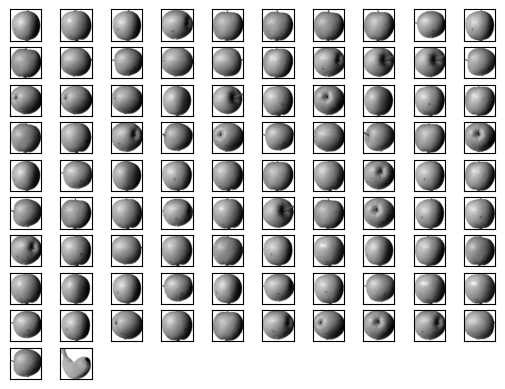

In [123]:
showKmeansClustImg(0)

In [ ]:
# pca를 통해 차원축소했을 때 얻을 수 있는 이점.

차원축소
  - 중요특성을 기준으로 축소를 했기때문에.
  - 학습속도 증가
  - 노이즈 제거
  - 정확성 향상
  - 다차원은 시각으로 표현하기 어려움.. 2차원으로 줄이면 시각적 표현이 자유롭다.(형태를 파악하기 쉬움)

In [124]:
data_pca_scaled.shape

(300, 2)

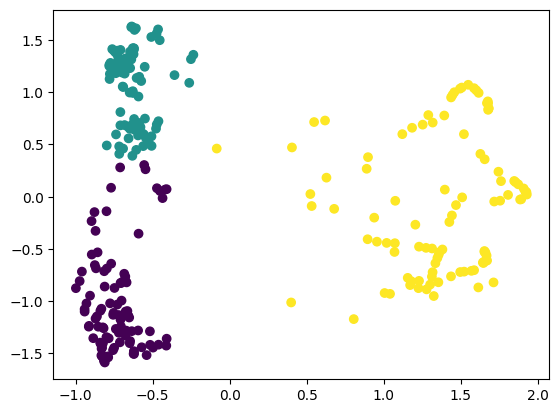

In [125]:
plt.scatter(data_pca_scaled[:,0],data_pca_scaled[:,1],c=target) 
# 2차원이니깐 0번째, 1번째
# 왜 완벽하게 못맞추냐
# 중심을 가지고 평균을 내서 찾다보니까.

In [127]:
from sklearn.datasets import load_iris

In [128]:
iris = load_iris()
X = iris.data
y = iris.target

In [129]:
pca = PCA(n_components=0.5)
pca.fit(X)

PCA(n_components=0.5)

In [131]:
X_pca = pca.fit_transform(X)
X_pca_s = StandardScaler().fit_transform(X_pca)

In [132]:
score = cross_validate(LogisticRegression(),X_pca,y)

In [133]:
score1 = cross_validate(LogisticRegression(),X_pca_s,y)

In [134]:
np.mean(score['test_score'])

0.9333333333333333

In [135]:
np.mean(score1['test_score'])

0.9333333333333333